Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


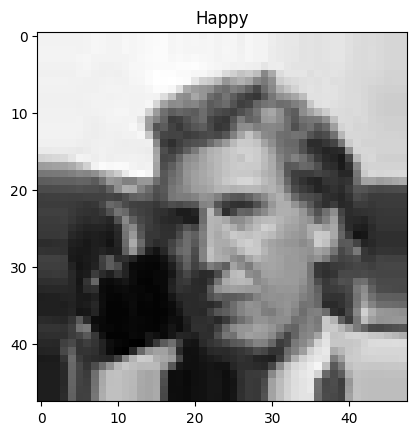

C:\Users\viole\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\viole\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


None
Epoch 1/50
 78/897 ━━━━━━━━━━━━━━━━━━━━ 1:07 83ms/step - accuracy: 0.2221 - loss: 1.8545

KeyboardInterrupt: 

In [2]:
"""
Bhattiprolu, S. (2021, October 13). 239 - Deep Learning training for facial emotion detection [Video]. YouTube. https://www.youtube.com/watch?v=P4OevrwTq78&t=11s

Changed 'validation' to 'test' for easy understanding
"""
import os
import random
import numpy as np
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Sets image dimensions and batch size
IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 32
classes = 7
epochs=50

#Project was running in wrong directory when in vscode, changed directory to the project folder
#script_dir = os.path.dirname(os.path.abspath(__file__))
#os.chdir(script_dir)

train_data_dir = 'data/train/'
test_data_dir = 'data/test/'

#Only for training data
train_datagen = ImageDataGenerator(
                    rescale=1./255, #Rescales pixel values to 0,1 range
                    rotation_range=30, #Rotates image by up to 30 degrees
                    shear_range=0.3, 
                    zoom_range=0.3,
                    horizontal_flip=True, #Flip some images horizontally
                    fill_mode='nearest') #Fills pixels with nearest values

#Only for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale', #Images are loaded in grayscale
                    target_size=(IMG_HEIGHT,IMG_WIDTH), #Images are resized
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True) #Shuffle data for randomness

test_generator = test_datagen.flow_from_directory(
                    test_data_dir,
                    color_mode='grayscale',
                    target_size=(IMG_HEIGHT,IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)

#Defining labels to allow for easier console reading
class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

#Displays random training image
img,label = train_generator.__next__()

#Chooses random image
i=random.randint(0, (img.shape[0])-1)
image = img[i]
label = class_labels[label[i].argmax()] #Finds the label
plt.imshow(image[:,:,0], cmap='gray') #Shows image in grayscale
plt.title(label)
plt.show()

# Creates the model
model = Sequential()

#Adds first convolutional layer (Applies filters to learn patterns)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #Reduces spatial dimensions of feature map
model.add(Dropout(0.1)) #Dropout layer to prevent overfitting

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

#Flattens feature maps to 1D vector
model.add(Flatten())

#Adds dense layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

#Adds output layer with 7 units
model.add(Dense(classes, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

num_train_imgs = 0
for root, dirs, files in os.walk(train_data_dir):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_data_dir):
    num_test_imgs += len(files)

#Stops training once no improvement 
early_stopping = EarlyStopping(monitor='val_loss', 
                              patience = 5, #Waits for this number of empochs after no improvements
                              restore_best_weights=True) # Restores weights of best epoch

#Trains the model
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size, #Calculates steps per epoch
                epochs=epochs,
                validation_data=test_generator, #Sets test_generator for validation
                validation_steps=num_test_imgs//batch_size,
                callbacks=[early_stopping])

#Saves model
model.save('emotion_detection_model.h5')

#plot the training and test accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Test the model
my_model = load_model('emotion_detection_model.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = test_generator.__next__()

#Predicts labels
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix to verify accuracy of each class

cm = confusion_matrix(test_labels, predictions)
#print(cm)
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()